In [1]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import time
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns

### Remove unnecessary columns and restricting the values to analyzable ranges.

In [2]:
capture_34_dataset = "D:/Course_Content/2ES/IOT_IDS/Model/CTU-IoT-Malware-Capture-34-1/conn.log.labeled"
capture_44_dataset = "D:/Course_Content/2ES/IOT_IDS/Model/CTU-IoT-Malware-Capture-44-1/conn.log.labeled"
capture_42_dataset = "D:/Course_Content/2ES/IOT_IDS/Model/CTU-IoT-Malware-Capture-42-1/conn.log.labeled"
capture_21_dataset = "D:/Course_Content/2ES/IOT_IDS/Model/CTU-IoT-Malware-Capture-21-1/conn.log.labeled"
capture_20_dataset = "D:/Course_Content/2ES/IOT_IDS/Model/CTU-IoT-Malware-Capture-20-1/conn.log"
capture_49_dataset = "D:/Course_Content/2ES/IOT_IDS/Model/CTU-IoT-Malware-Capture-49-1/conn.log.labeled"
capture_60_dataset = "D:/Course_Content/2ES/IOT_IDS/Model/CTU-IoT-Malware-Capture-60-1/conn.log.labeled"
capture_36_dataset = "D:/Course_Content/2ES/IOT_IDS/Model/CTU-IoT-Malware-Capture-60-1/conn.log.labeled"
capture_8_dataset = "D:/Course_Content/2ES/IOT_IDS/Model/CTU-IoT-Malware-Capture-8-1/conn.log"
capture_35_dataset = "D:/Course_Content/2ES/IOT_IDS/Model/CTU-IoT-Malware-Capture-35-1/conn.log.labeled"
capture_48_dataset = "D:/Course_Content/2ES/IOT_IDS/Model/CTU-IoT-Malware-Capture-48-1/conn.log"
capture_1_dataset = "D:/Course_Content/2ES/IOT_IDS/Model/CTU-IoT-Malware-Capture-1-1/conn.log.labeled"
capture_3_dataset = "D:/Course_Content/2ES/IOT_IDS/Model/CTU-IoT-Malware-Capture-3-1/conn.log.labeled"
capture_9_dataset = "D:/Course_Content/2ES/IOT_IDS/Model/CTU-IoT-Malware-Capture-9-1/conn.log.labeled"
capture_7_dataset = "D:/Course_Content/2ES/IOT_IDS/Model/CTU-IoT-Malware-Capture-7-1/conn.log"

file_paths = [capture_34_dataset, capture_44_dataset, capture_42_dataset, capture_21_dataset, capture_20_dataset, 
              capture_49_dataset, capture_60_dataset, capture_36_dataset, capture_8_dataset, capture_35_dataset,
              capture_48_dataset, capture_1_dataset, capture_3_dataset, capture_9_dataset, capture_7_dataset] 

data_frames = [] 

for file_path in file_paths:
    df = pd.read_table(filepath_or_buffer=file_path, skiprows=10, nrows=100000)
    df.columns=  ['ts',
                  'uid',
                  'id.orig_h', 
                  'id.orig_p',
                  'id.resp_h',
                  'id.resp_p',
                  'proto',
                  'service',
                  'duration',
                  'orig_bytes',
                  'resp_bytes',
                  'conn_state',
                  'local_orig',
                  'local_resp',
                  'missed_bytes',
                  'history',
                  'orig_pkts',
                  'orig_ip_bytes',
                  'resp_pkts',
                  'resp_ip_bytes',
                  'label']
    data_frames.append(df)

df_c = pd.concat(data_frames, ignore_index=True)

In [3]:
df_c

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,1545403848.981338,CDrkrSobGYxHhYfth,192.168.1.195,41040.0,185.244.25.235,80.0,tcp,http,1.477656,149,...,SF,-,-,2896.0,ShADadttcfF,94.0,5525.0,96.0,139044.0,- Benign -
1,1545403850.554283,CTWZQf2oJSvq6zmPAc,192.168.1.195,41042.0,185.244.25.235,80.0,tcp,-,3.147116,0,...,S0,-,-,0.0,S,3.0,180.0,0.0,0.0,- Benign -
2,1545403857.781320,CvyynC4Sabj9BNXFRi,192.168.1.195,41042.0,185.244.25.235,80.0,tcp,http,1.305004,151,...,SF,-,-,5792.0,ShADadttcfF,96.0,5699.0,92.0,133140.0,- Benign -
3,1545403859.183341,CWYyiA2sgRijwk2jEd,192.168.1.195,41044.0,185.244.25.235,80.0,tcp,http,1.004605,148,...,SF,-,-,2896.0,ShADadtcfF,67.0,4148.0,65.0,92453.0,- Benign -
4,1545403860.282392,CYttPy2pqOIcen7UDh,192.168.1.195,41046.0,185.244.25.235,80.0,tcp,http,4.129647,148,...,SF,-,-,5792.0,ShADadtcfF,75.0,4412.0,69.0,97107.0,- Benign -
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944689,1532101984.141497,Csuod01u7XpmkoBXC5,192.168.100.108,5526.0,124.181.92.136,37215.0,tcp,-,-,-,...,S0,-,-,0.0,S,1.0,40.0,0.0,0.0,(empty) Malicious Okiru
944690,1532101984.141747,CoDnNk44S7ABRu4mK6,192.168.100.108,5526.0,4.220.14.84,37215.0,tcp,-,-,-,...,S0,-,-,0.0,S,1.0,40.0,0.0,0.0,(empty) Malicious Okiru
944691,1532101984.141997,CU3enPVpPrS1FfOrd,192.168.100.108,5526.0,216.56.236.235,37215.0,tcp,-,-,-,...,S0,-,-,0.0,S,1.0,40.0,0.0,0.0,(empty) Malicious Okiru
944692,1532101984.142,CA0BuT2uK8a5KBLmJ,192.168.100.108,5526.0,17.52.177.44,37215.0,tcp,-,-,-,...,S0,-,-,0.0,S,1.0,40.0,0.0,0.0,(empty) Malicious Okiru


In [4]:
df_c['label'].value_counts()

(empty)   Malicious   PartOfAHorizontalPortScan    247024
-   Malicious   DDoS                               213243
-   Malicious   PartOfAHorizontalPortScan          199773
-   Benign   -                                     114085
(empty)   Malicious   Okiru                         99675
(empty)   Benign   -                                51535
(empty)   Malicious   C&C                            8229
-   Malicious   C&C                                  6829
(empty)   Malicious   Attack                         3815
-   Malicious   C&C-HeartBeat                         186
(empty)   Malicious   C&C-HeartBeat                   122
-   Malicious   Attack                                101
-   Malicious   C&C-Torii                              30
-   Malicious   C&C-FileDownload                       20
-   Malicious   FileDownload                           13
-   Malicious   C&C-HeartBeat-FileDownload              8
Name: label, dtype: int64

In [5]:
df_c.loc[(df_c.label == '-   Malicious   PartOfAHorizontalPortScan'), 'label'] = 'PartOfAHorizontalPortScan'
df_c.loc[(df_c.label == '(empty)   Malicious   PartOfAHorizontalPortScan'), 'label'] = 'PartOfAHorizontalPortScan'
df_c.loc[(df_c.label == '-   Malicious   Okiru'), 'label'] = 'Okiru'
df_c.loc[(df_c.label == '(empty)   Malicious   Okiru'), 'label'] = 'Okiru'
df_c.loc[(df_c.label == '-   Benign   -'), 'label'] = 'Benign'
df_c.loc[(df_c.label == '(empty)   Benign   -'), 'label'] = 'Benign'
df_c.loc[(df_c.label == '-   Malicious   DDoS'), 'label'] = 'DDoS'
df_c.loc[(df_c.label == '-   Malicious   C&C'), 'label'] = 'C&C'
df_c.loc[(df_c.label == '(empty)   Malicious   C&C'), 'label'] = 'C&C'
df_c.loc[(df_c.label == '-   Malicious   Attack'), 'label'] = 'Attack'
df_c.loc[(df_c.label == '(empty)   Malicious   Attack'), 'label'] = 'Attack'
df_c.loc[(df_c.label == '-   Malicious   C&C-HeartBeat'), 'label'] = 'C&C-HeartBeat'
df_c.loc[(df_c.label == '(empty)   Malicious   C&C-HeartBeat'), 'label'] = 'C&C-HeartBeat'
df_c.loc[(df_c.label == '-   Malicious   C&C-FileDownload'), 'label'] = 'C&C-FileDownload'
df_c.loc[(df_c.label == '-   Malicious   C&C-Torii'), 'label'] = 'C&C-Torii'
df_c.loc[(df_c.label == '-   Malicious   C&C-HeartBeat-FileDownload'), 'label'] = 'C&C-HeartBeat-FileDownload'
df_c.loc[(df_c.label == '-   Malicious   FileDownload'), 'label'] = 'FileDownload'
df_c.loc[(df_c.label == '-   Malicious   C&C-Mirai'), 'label'] = 'C&C-Mirai'
df_c.loc[(df_c.label == '-   Malicious   Okiru-Attack'), 'label'] = 'Okiru-Attack'

In [6]:
df_c['label'].value_counts()

PartOfAHorizontalPortScan     446797
DDoS                          213243
Benign                        165620
Okiru                          99675
C&C                            15058
Attack                          3916
C&C-HeartBeat                    308
C&C-Torii                         30
C&C-FileDownload                  20
FileDownload                      13
C&C-HeartBeat-FileDownload         8
Name: label, dtype: int64

In [7]:
df_c = df_c.drop(columns=['ts','uid','id.orig_h','id.orig_p','id.resp_h','id.resp_p', 'service','local_orig','local_resp','history'])

In [8]:
df_c = pd.get_dummies(df_c, columns=['proto'])
df_c = pd.get_dummies(df_c, columns=['conn_state'])

In [9]:
df_c

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,proto_icmp,...,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
0,1.477656,149,128252,2896.0,94.0,5525.0,96.0,139044.0,Benign,0,...,0,0,0,0,0,0,0,1,0,0
1,3.147116,0,0,0.0,3.0,180.0,0.0,0.0,Benign,0,...,0,0,0,1,0,0,0,0,0,0
2,1.305004,151,128348,5792.0,96.0,5699.0,92.0,133140.0,Benign,0,...,0,0,0,0,0,0,0,1,0,0
3,1.004605,148,91961,2896.0,67.0,4148.0,65.0,92453.0,Benign,0,...,0,0,0,0,0,0,0,1,0,0
4,4.129647,148,99303,5792.0,75.0,4412.0,69.0,97107.0,Benign,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944689,-,-,-,0.0,1.0,40.0,0.0,0.0,Okiru,0,...,0,0,0,1,0,0,0,0,0,0
944690,-,-,-,0.0,1.0,40.0,0.0,0.0,Okiru,0,...,0,0,0,1,0,0,0,0,0,0
944691,-,-,-,0.0,1.0,40.0,0.0,0.0,Okiru,0,...,0,0,0,1,0,0,0,0,0,0
944692,-,-,-,0.0,1.0,40.0,0.0,0.0,Okiru,0,...,0,0,0,1,0,0,0,0,0,0


In [10]:
df_c['duration'] = df_c['duration'].str.replace('-','0')
df_c['orig_bytes'] = df_c['orig_bytes'].str.replace('-','0')
df_c['resp_bytes'] = df_c['resp_bytes'].str.replace('-','0')
df_c

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,proto_icmp,...,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
0,1.477656,149,128252,2896.0,94.0,5525.0,96.0,139044.0,Benign,0,...,0,0,0,0,0,0,0,1,0,0
1,3.147116,0,0,0.0,3.0,180.0,0.0,0.0,Benign,0,...,0,0,0,1,0,0,0,0,0,0
2,1.305004,151,128348,5792.0,96.0,5699.0,92.0,133140.0,Benign,0,...,0,0,0,0,0,0,0,1,0,0
3,1.004605,148,91961,2896.0,67.0,4148.0,65.0,92453.0,Benign,0,...,0,0,0,0,0,0,0,1,0,0
4,4.129647,148,99303,5792.0,75.0,4412.0,69.0,97107.0,Benign,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944689,0,0,0,0.0,1.0,40.0,0.0,0.0,Okiru,0,...,0,0,0,1,0,0,0,0,0,0
944690,0,0,0,0.0,1.0,40.0,0.0,0.0,Okiru,0,...,0,0,0,1,0,0,0,0,0,0
944691,0,0,0,0.0,1.0,40.0,0.0,0.0,Okiru,0,...,0,0,0,1,0,0,0,0,0,0
944692,0,0,0,0.0,1.0,40.0,0.0,0.0,Okiru,0,...,0,0,0,1,0,0,0,0,0,0


In [11]:
df_c.fillna(-1,inplace=True)
check=df_c.isna().sum()
check

duration             0
orig_bytes           0
resp_bytes           0
missed_bytes         0
orig_pkts            0
orig_ip_bytes        0
resp_pkts            0
resp_ip_bytes        0
label                0
proto_icmp           0
proto_tcp            0
proto_udp            0
conn_state_OTH       0
conn_state_REJ       0
conn_state_RSTO      0
conn_state_RSTOS0    0
conn_state_RSTR      0
conn_state_RSTRH     0
conn_state_S0        0
conn_state_S1        0
conn_state_S2        0
conn_state_S3        0
conn_state_SF        0
conn_state_SH        0
conn_state_SHR       0
dtype: int64

In [12]:
df_c

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,proto_icmp,...,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
0,1.477656,149,128252,2896.0,94.0,5525.0,96.0,139044.0,Benign,0,...,0,0,0,0,0,0,0,1,0,0
1,3.147116,0,0,0.0,3.0,180.0,0.0,0.0,Benign,0,...,0,0,0,1,0,0,0,0,0,0
2,1.305004,151,128348,5792.0,96.0,5699.0,92.0,133140.0,Benign,0,...,0,0,0,0,0,0,0,1,0,0
3,1.004605,148,91961,2896.0,67.0,4148.0,65.0,92453.0,Benign,0,...,0,0,0,0,0,0,0,1,0,0
4,4.129647,148,99303,5792.0,75.0,4412.0,69.0,97107.0,Benign,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944689,0,0,0,0.0,1.0,40.0,0.0,0.0,Okiru,0,...,0,0,0,1,0,0,0,0,0,0
944690,0,0,0,0.0,1.0,40.0,0.0,0.0,Okiru,0,...,0,0,0,1,0,0,0,0,0,0
944691,0,0,0,0.0,1.0,40.0,0.0,0.0,Okiru,0,...,0,0,0,1,0,0,0,0,0,0
944692,0,0,0,0.0,1.0,40.0,0.0,0.0,Okiru,0,...,0,0,0,1,0,0,0,0,0,0


In [23]:
df_c = df_c[df_c['label'] != -1]
df_c['label'].value_counts()

PartOfAHorizontalPortScan     446797
DDoS                          213243
Benign                        165620
Okiru                          99675
C&C                            15058
Attack                          3916
C&C-HeartBeat                    308
C&C-Torii                         30
C&C-FileDownload                  20
FileDownload                      13
C&C-HeartBeat-FileDownload         8
Name: label, dtype: int64

In [14]:
for col in df_c.columns: 
    print(col) 

duration
orig_bytes
resp_bytes
missed_bytes
orig_pkts
orig_ip_bytes
resp_pkts
resp_ip_bytes
label
proto_icmp
proto_tcp
proto_udp
conn_state_OTH
conn_state_REJ
conn_state_RSTO
conn_state_RSTOS0
conn_state_RSTR
conn_state_RSTRH
conn_state_S0
conn_state_S1
conn_state_S2
conn_state_S3
conn_state_SF
conn_state_SH
conn_state_SHR


In [15]:
X = df_c[['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'proto_tcp', 'proto_udp', 'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH', 'conn_state_S0', 'conn_state_S1', 'conn_state_S2', 'conn_state_S3', 'conn_state_SF', 'conn_state_SH', 'conn_state_SHR']]
Y = df_c['label']

In [16]:
scaler = MinMaxScaler()
scaler.fit(X)
normalized_x = scaler.transform(X)
normalized_x

array([[5.05873076e-05, 8.59682379e-08, 7.46181907e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.46733497e-05, 5.73121586e-10, 5.81804642e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.70622017e-05, 8.71144811e-08, 7.46740439e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.04174057e-05, 5.73121586e-10, 5.81804642e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.04174057e-05, 5.73121586e-10, 5.81804642e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.04174057e-05, 5.73121586e-10, 5.81804642e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(normalized_x, Y, random_state=100, test_size=0.2) # 20% test size

In [18]:
clf = GaussianNB()
clf.fit(X_train, Y_train)

GaussianNB()

In [19]:
clf = GaussianNB().fit(X_train, Y_train)
print(clf.score(X_test, Y_test))
y_pred = clf.fit(X_train, Y_train).predict(X_test)
print(y_pred)

0.39822587303771606
['Okiru' 'Okiru' 'Okiru' ... 'Okiru' 'Okiru' 'DDoS']


In [20]:
def NB_accuracy():
    accuracy = accuracy_score(Y_test, y_pred)
    print("Accuracy:", accuracy)

NB_accuracy()

Accuracy: 0.39822587303771606


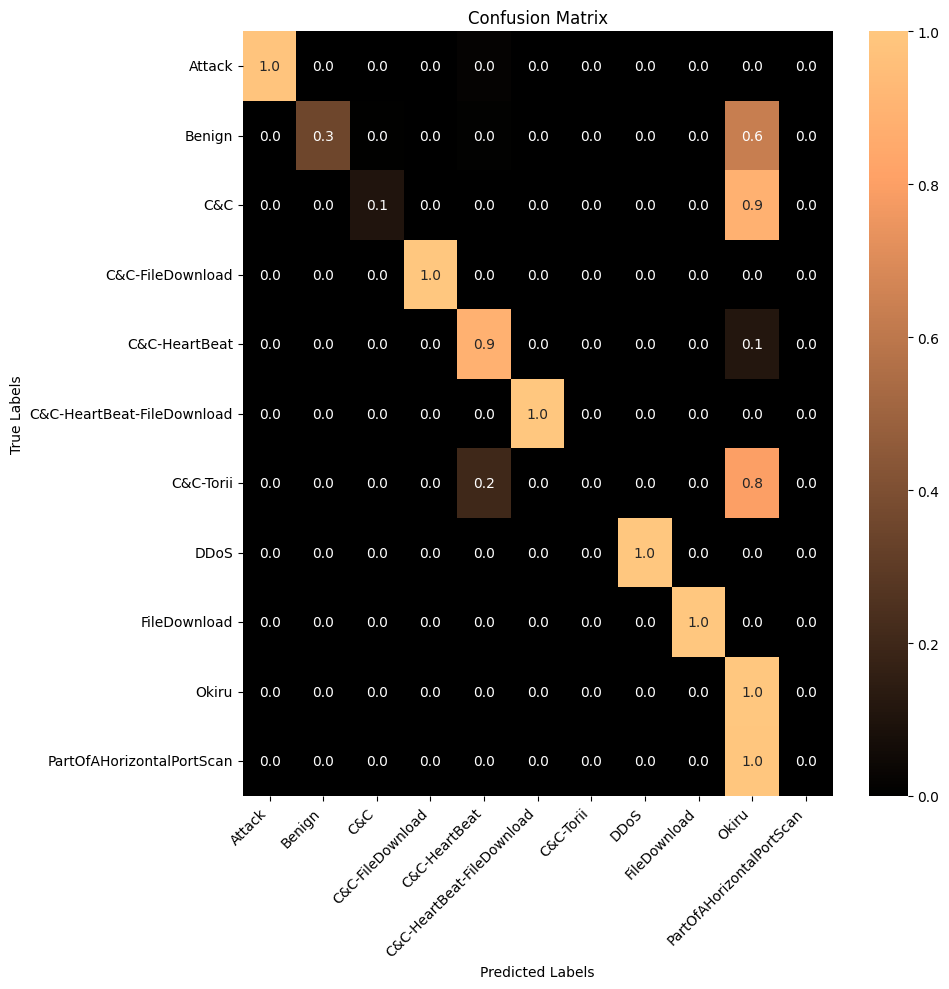

In [33]:
cm_prob = confusion_matrix(Y_test, y_pred, normalize='true') 
# print(cm)
classes = ['Attack', 'Benign', 'C&C', 'C&C-FileDownload', 'C&C-HeartBeat', 'C&C-HeartBeat-FileDownload',  
           'C&C-Torii', 'DDoS', 'FileDownload', 'Okiru', 'PartOfAHorizontalPortScan']


plt.figure(figsize=(10, 10))
sns.heatmap(cm_prob, annot=True, fmt='0.1f', cmap='copper', xticklabels=classes, yticklabels=classes)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()

In [30]:
value_list = []

for i in Y_test:
    value_list.append(i)

values_array = np.array(value_list)
print(classification_report(values_array, y_pred))



                            precision    recall  f1-score   support

                    Attack       0.79      0.98      0.87       836
                    Benign       1.00      0.35      0.52     33091
                       C&C       0.65      0.10      0.18      3005
          C&C-FileDownload       0.57      1.00      0.73         4
             C&C-HeartBeat       0.10      0.89      0.18        72
C&C-HeartBeat-FileDownload       1.00      1.00      1.00         1
                 C&C-Torii       0.00      0.00      0.00         5
                      DDoS       1.00      1.00      1.00     42382
              FileDownload       0.17      1.00      0.29         1
                     Okiru       0.15      1.00      0.26     20135
 PartOfAHorizontalPortScan       1.00      0.00      0.00     89406

                  accuracy                           0.40    188938
                 macro avg       0.58      0.67      0.46    188938
              weighted avg       0.90      0.4